In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, StrMethodFormatter
import seaborn as sns

In [14]:
sns.set_theme(style="ticks", palette="pastel")

In [15]:
data = pd.read_csv('AMI_GSE66360_series_matrix.csv', encoding='utf-8', skiprows=58, encoding_errors='ignore', index_col=0, low_memory=False)
data

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99
Class,H,H,H,H,H,H,H,H,H,H,...,M,M,M,M,M,M,M,M,M,M
ID_REF,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,GSM1620828,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,6.016415473,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,7.580840863,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
117_at,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,6.307065808,...,6.789500767,7.441939912,7.026928573,6.003972814,7.474325713,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-ThrX-5_at,3.139333661,3.039961017,3.220109351,3.263781541,3.138524252,3.043078536,3.231107638,3.304715967,3.384011442,3.139503936,...,3.525011316,3.309030335,3.663399948,3.32400503,4.619261018,5.558780351,3.416999272,3.699181146,3.48527965,4.211921779
AFFX-ThrX-M_at,2.7470148,2.63860588,2.495261011,2.544198973,2.506629527,2.817981885,2.525060286,2.91727791,2.643849254,2.787683948,...,2.930794418,2.745955351,3.165167607,2.899104156,4.066775612,5.429436708,2.834741433,3.24968301,2.71141329,3.346834702
AFFX-TrpnX-3_at,2.651554479,2.643615067,2.626028059,2.504957719,2.609707404,2.521610278,2.840601479,2.509774164,2.696820467,2.793540013,...,2.788852359,2.725246769,3.143400613,2.76875475,3.546116866,4.487940292,2.782355764,3.056726837,2.833818355,3.06954169
AFFX-TrpnX-5_at,3.413429017,3.399062751,3.539969696,3.396225335,3.43472012,3.516089622,3.514949337,3.475952299,3.495198562,3.580410844,...,3.701271488,3.456716807,4.127459216,3.668326993,4.889324389,4.254285925,3.882079933,3.649826789,3.523410023,4.108475085


In [16]:
count_M = (data.loc["Class"] == "M").sum()
count_H = (data.loc["Class"] == "H").sum()
count_M, count_H

(49, 50)

In [17]:
data_without_incomplete_genes = data.dropna()
data_without_incomplete_genes

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99
Class,H,H,H,H,H,H,H,H,H,H,...,M,M,M,M,M,M,M,M,M,M
ID_REF,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,GSM1620828,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,6.016415473,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,7.580840863,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
117_at,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,6.307065808,...,6.789500767,7.441939912,7.026928573,6.003972814,7.474325713,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-ThrX-5_at,3.139333661,3.039961017,3.220109351,3.263781541,3.138524252,3.043078536,3.231107638,3.304715967,3.384011442,3.139503936,...,3.525011316,3.309030335,3.663399948,3.32400503,4.619261018,5.558780351,3.416999272,3.699181146,3.48527965,4.211921779
AFFX-ThrX-M_at,2.7470148,2.63860588,2.495261011,2.544198973,2.506629527,2.817981885,2.525060286,2.91727791,2.643849254,2.787683948,...,2.930794418,2.745955351,3.165167607,2.899104156,4.066775612,5.429436708,2.834741433,3.24968301,2.71141329,3.346834702
AFFX-TrpnX-3_at,2.651554479,2.643615067,2.626028059,2.504957719,2.609707404,2.521610278,2.840601479,2.509774164,2.696820467,2.793540013,...,2.788852359,2.725246769,3.143400613,2.76875475,3.546116866,4.487940292,2.782355764,3.056726837,2.833818355,3.06954169
AFFX-TrpnX-5_at,3.413429017,3.399062751,3.539969696,3.396225335,3.43472012,3.516089622,3.514949337,3.475952299,3.495198562,3.580410844,...,3.701271488,3.456716807,4.127459216,3.668326993,4.889324389,4.254285925,3.882079933,3.649826789,3.523410023,4.108475085


In [18]:
# Is this neccessary?
transposed_data_frame_without_incomplete_genes = data_without_incomplete_genes.T
transposed_data_frame_without_incomplete_genes

,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
Unnamed: 1,H,GSM1620819,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,...,13.25732501,13.26623454,14.57122985,14.27656808,4.504659469,3.139333661,2.7470148,2.651554479,3.413429017,3.140611771
Unnamed: 2,H,GSM1620820,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,...,13.59386023,13.51701336,14.73883363,14.34123318,4.409225776,3.039961017,2.63860588,2.643615067,3.399062751,3.132691213
Unnamed: 3,H,GSM1620821,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,...,13.37275868,13.41658291,14.62718054,14.31856805,4.310075612,3.220109351,2.495261011,2.626028059,3.539969696,3.698396097
Unnamed: 4,H,GSM1620822,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,...,13.49022556,13.49482728,14.75412393,14.3632965,4.439310699,3.263781541,2.544198973,2.504957719,3.396225335,3.638611866
Unnamed: 5,H,GSM1620823,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,...,13.23678545,13.33019244,14.54838931,14.26367675,4.562883241,3.138524252,2.506629527,2.609707404,3.43472012,3.577649067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unnamed: 95,M,GSM1620913,6.472517225,8.261421952,6.367759272,6.440978114,3.73013912,7.355729877,6.206879166,6.217929861,...,6.601745953,5.94230757,7.290513508,8.988510881,5.567947288,5.558780351,5.429436708,4.487940292,4.254285925,5.375810973
Unnamed: 96,M,GSM1620914,5.678815851,6.925752665,6.835755831,6.955883278,2.914867562,7.944294937,6.638364166,5.992343792,...,14.2710373,14.16370633,14.88450605,14.79250553,4.902195229,3.416999272,2.834741433,2.782355764,3.882079933,3.744138165
Unnamed: 97,M,GSM1620915,5.653286378,7.918424183,7.577034915,6.499215058,3.013901455,8.563122679,7.379567509,5.766028609,...,13.89861618,13.68242475,14.88450605,14.78380144,5.239906199,3.699181146,3.24968301,3.056726837,3.649826789,4.021536308
Unnamed: 98,M,GSM1620916,6.013841046,7.442701377,7.147417202,6.587065112,2.729319786,8.699221635,6.598349589,5.577456268,...,13.84700646,13.55159338,14.85806628,14.7781659,4.556134169,3.48527965,2.71141329,2.833818355,3.523410023,3.81256443


3. Analysis:<br>
a. There are 54675 profiled genes in described in the dataset.<br>
b. There are 99 samples (subjects/patients) in total.<br>
c. There are 49 samples in class "M" and 50 samples in class "H".<br>
d. After removing the rows with the missing values - there were left 54630 rows in the dataframe which represent 54628 genes.<br> 

[4.42530617 5.04477066 5.71310787 4.61500445 5.08690667 5.70725041]
[4.217588   4.46029438 4.90125923 4.31603876 4.69951718 5.05056826]
[6.8863755  8.04200884 8.53064093 6.75071628 8.31106445 8.74718523]
[2.79652209 3.06848595 3.42196888 2.72451619 3.06065876 3.65700375]
[5.33140548 5.47384709 5.63726886 5.29128533 5.47384709 5.83614873]
[6.47995516 6.78233466 6.95578158 6.45191788 6.65284847 6.79824044]
[7.84101945 8.48136967 8.8606296  7.65039143 8.12846788 8.55248394]
[5.02277446 5.46622544 6.11186895 5.13656556 5.3573242  5.77545814]
[8.54032888 9.25031462 9.42672015 8.17801901 8.98981283 9.39387607]
[3.43332219 3.68103691 3.92450768 3.50259526 3.73880267 4.2299167 ]
[11.58657859 11.86988827 12.02440646 11.72137269 11.85568733 11.99715842]
[11.73251906 12.10844159 12.20961746 11.14981744 11.59004521 11.90509692]
[7.18887318 8.13858958 8.67260847 7.4321825  8.13072804 8.59849041]
[5.40153353 6.09223918 6.95083587 6.20332757 6.70595872 7.25300654]
[4.78876319 5.00615798 5.38036341 4.

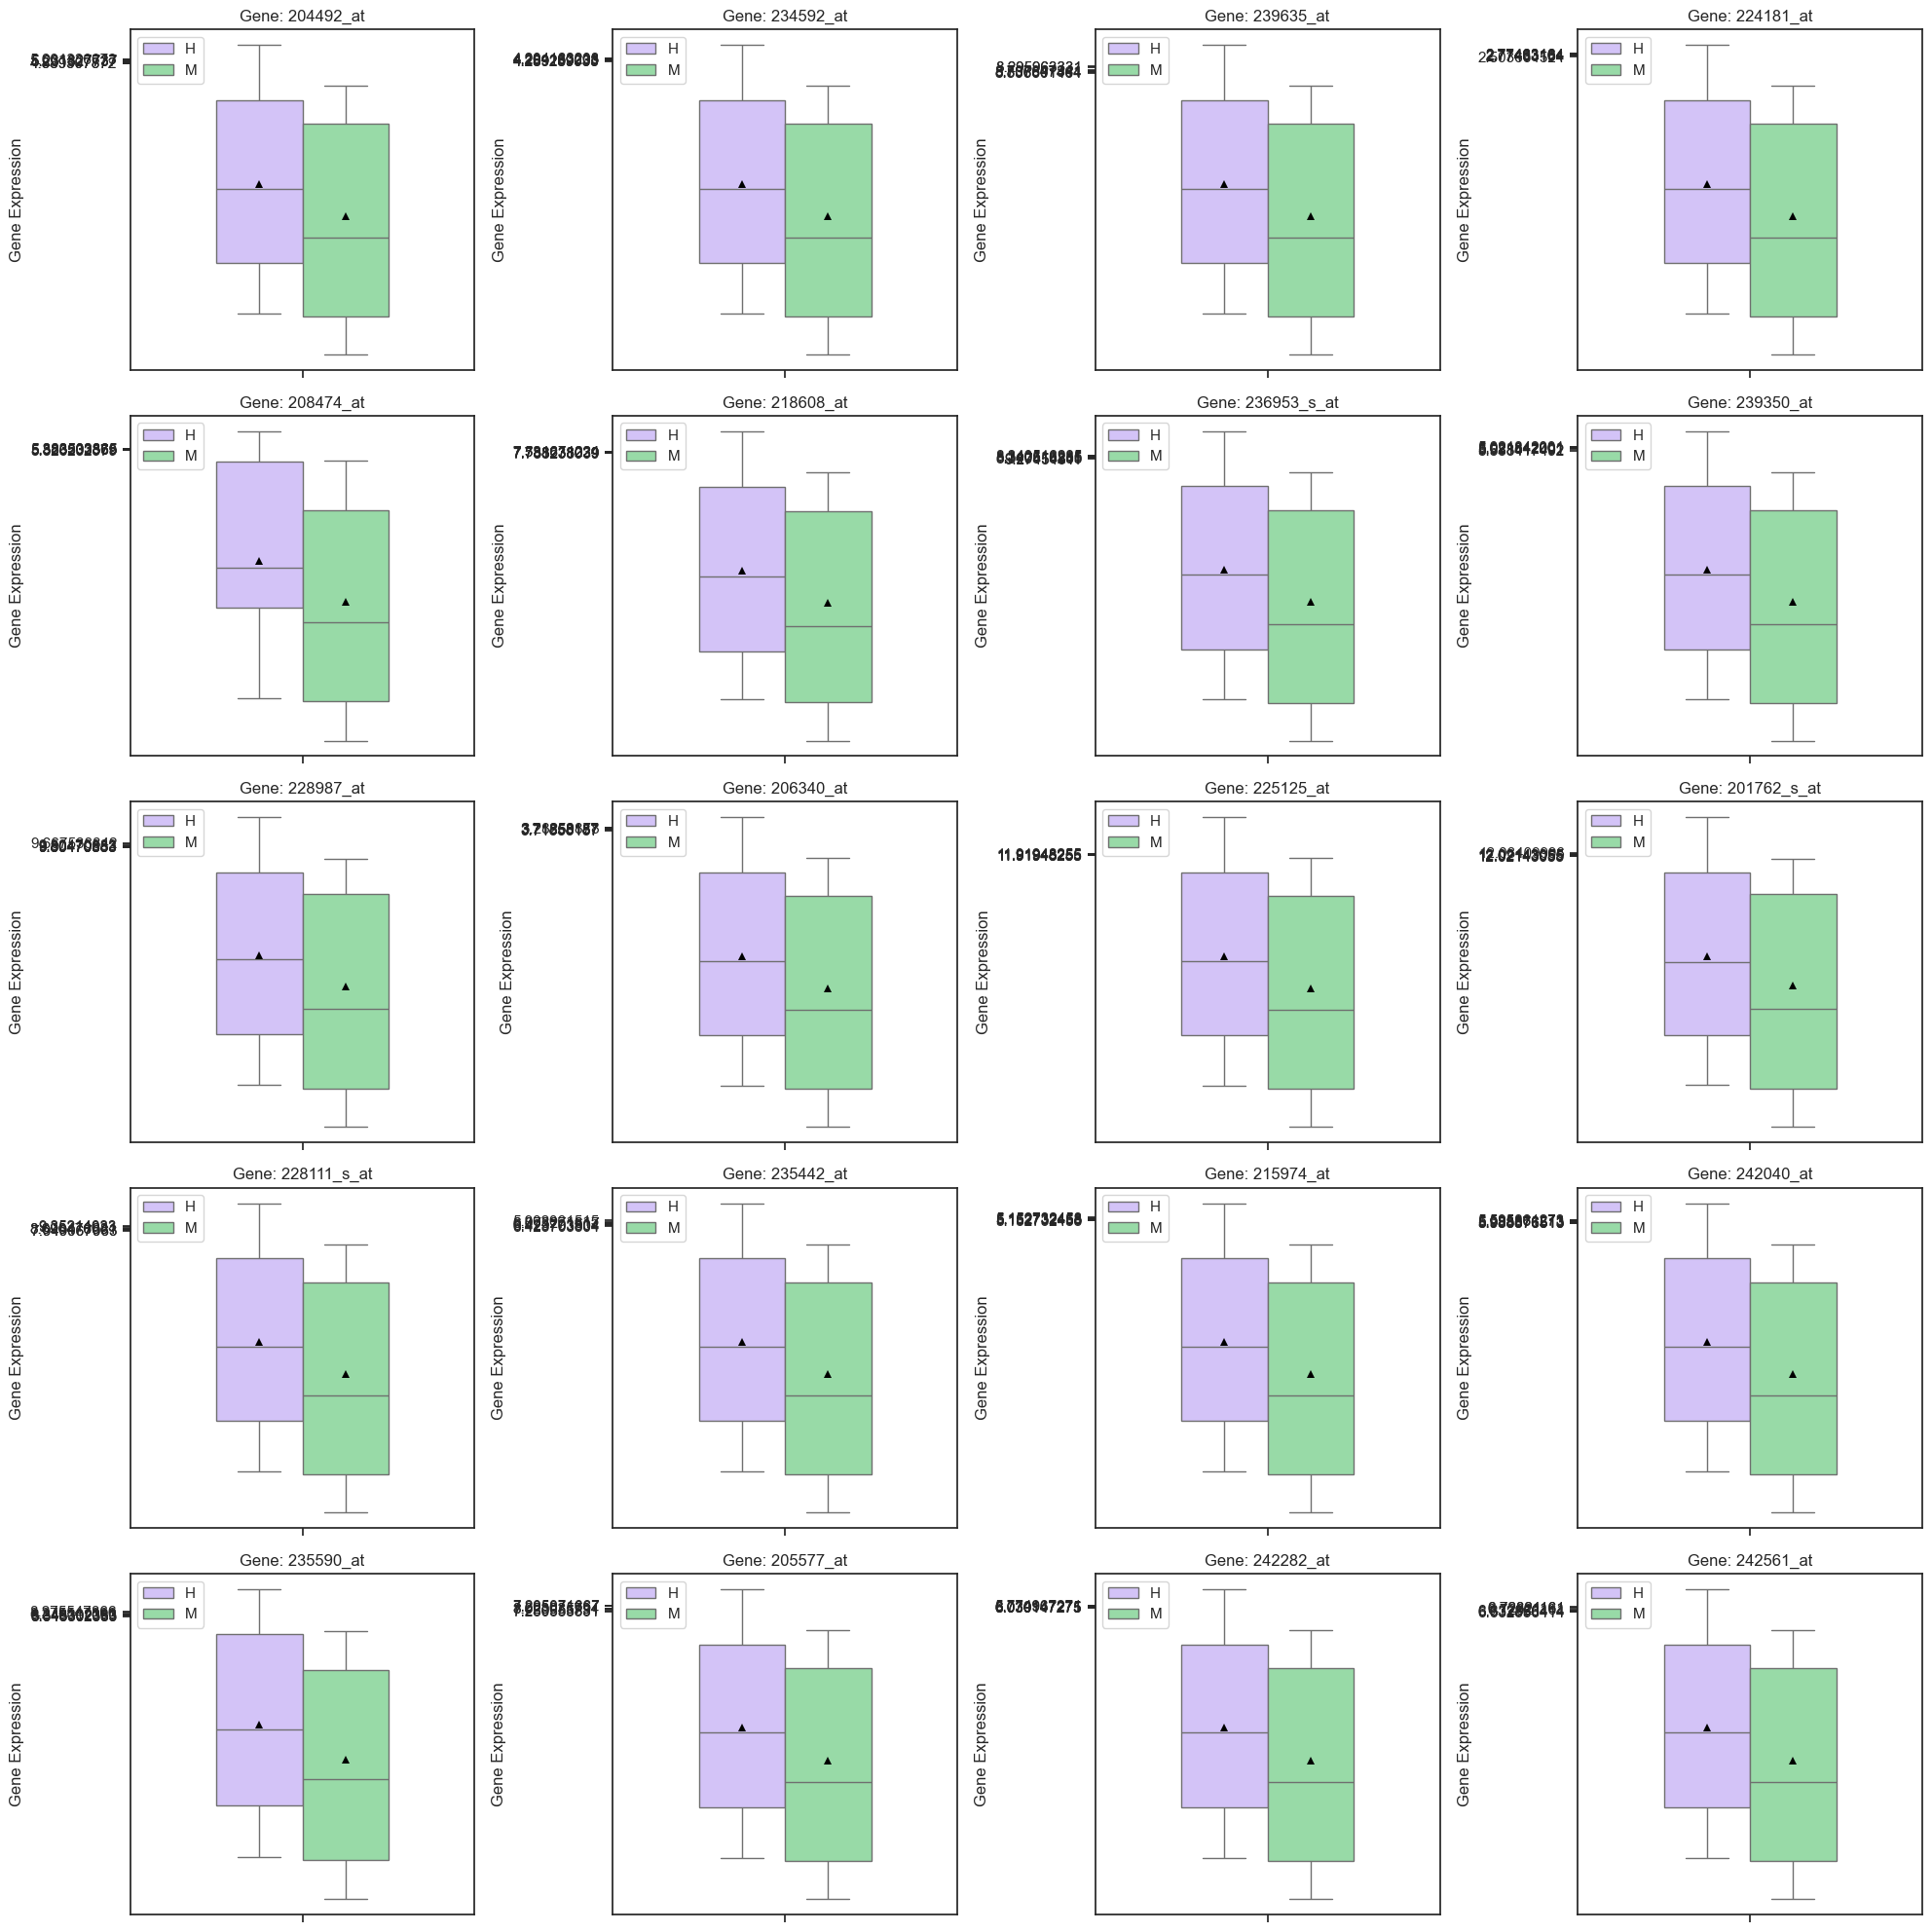

,Class,204492_at,234592_at,239635_at,224181_at,208474_at,218608_at,236953_s_at,239350_at,228987_at,...,225125_at,201762_s_at,228111_s_at,235442_at,215974_at,242040_at,235590_at,205577_at,242282_at,242561_at
Unnamed: 1,H,5.825307772,3.895762569,8.681787651,3.141293252,5.21170401,7.051773059,8.436290534,5.036764751,9.271822767,...,12.71359328,12.20194929,8.374292108,6.66812349,4.944342154,5.176606302,8.327962934,7.089575907,5.629124056,7.001210172
Unnamed: 2,H,4.888134236,4.487961221,8.45493459,2.557354147,5.401201405,6.928103169,8.368162802,5.480769916,9.301477185,...,11.50962905,11.72292414,7.650029456,5.908950882,5.851759327,6.325780051,8.171564996,7.160066163,5.106916826,6.368992746
Unnamed: 3,H,4.327243295,4.385995843,9.22119168,3.52165333,5.279193693,6.691663282,10.07786665,5.08007168,9.00417216,...,12.14532652,11.93499901,8.338594508,7.004819439,4.787479149,5.395508701,7.683940617,7.105882751,5.981993701,7.478234111
Unnamed: 4,H,5.023025769,4.576595119,8.587046341,2.77463164,5.670947726,6.95609892,8.734337921,5.094794163,9.527514361,...,11.52711828,12.16712044,8.202569432,5.397895823,4.972621154,5.873659681,8.81052113,7.44250535,4.9200343,7.276838837
Unnamed: 5,H,5.601336673,4.204163208,8.555876379,2.503664524,5.417840659,7.232037609,8.4991262,5.279463572,9.242431551,...,11.63133958,11.98768872,8.104047628,6.429980095,5.416070658,5.172507974,11.16894647,7.11594262,5.885953381,7.220544738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unnamed: 95,M,5.782185513,7.154373426,6.528571631,5.890177208,5.65895998,5.718688256,6.993767491,6.651092254,5.521633505,...,5.93708553,7.314837151,7.781647316,7.690247069,6.475005738,7.002195995,6.797652142,3.907828315,7.002727839,4.957084304
Unnamed: 96,M,5.007065388,5.139580928,6.54438542,3.657003752,5.929733229,6.223610707,6.811056748,6.741819263,7.282657907,...,11.71841354,11.16636279,8.130728038,6.382430246,5.441048244,5.945075805,7.886684996,5.153198016,5.334794259,5.768337384
Unnamed: 97,M,4.524604591,5.017787818,8.07604378,3.382773787,5.617794974,6.679165428,7.965057026,5.541055086,8.841726101,...,11.73399664,11.49709752,9.672140876,6.539595591,4.869203833,5.37115678,8.493854498,4.927153305,5.650274964,6.660855722
Unnamed: 98,M,4.56616198,4.964266461,8.844084643,2.638632939,5.163136988,6.350261692,9.131976551,5.140611525,8.744437004,...,11.82813853,11.67299377,7.432182503,6.989187001,4.943736906,5.25494798,7.901010098,6.39513615,5.172933619,7.425921723


In [43]:
data_without_incomplete_genes_and_IDREF = data_without_incomplete_genes.drop("ID_REF")
gene_names = data_without_incomplete_genes_and_IDREF.index
selected_genes = np.random.choice(gene_names, 20, replace=False)
selected_genes_with_label = np.insert(selected_genes, 0, "Class")
subset_data_without_incomplete_genes_and_IDREF = data_without_incomplete_genes_and_IDREF.loc[selected_genes_with_label].T

fig, axes = plt.subplots(5, 4, figsize=(20, 20))

axes = axes.flatten()

for i, gene in enumerate(selected_genes):
    gene_data = pd.DataFrame(subset_data_without_incomplete_genes_and_IDREF[gene].astype(float))
    H_gene_data = gene_data[subset_data_without_incomplete_genes_and_IDREF["Class"] == "H"]
    M_gene_data = gene_data[subset_data_without_incomplete_genes_and_IDREF["Class"] == "M"]

    H_quartiles = np.percentile(H_gene_data, [25, 50, 75])
    M_quartiles = np.percentile(M_gene_data, [25, 50, 75])

    ticks = np.concatenate([H_quartiles, M_quartiles])    
    # print(ticks)
    sns.boxplot(y=gene,hue="Class", palette=["m", "g"],data=subset_data_without_incomplete_genes_and_IDREF, ax=axes[i], showfliers=True, showmeans=True, meanprops={"markerfacecolor":"black", "markeredgewidth":0}, width=0.5)    
    axes[i].set_title(f'Gene: {gene}')
    axes[i].set_ylabel('Gene Expression')
    axes[i].set_yticks(ticks)
    axes[i].legend(loc='upper left')
    
    # min_value = gene_data.min()[gene]
    # max_value = gene_data.max()[gene]
    # buffer = 0.1 
    # new_ylim = (min_value - buffer, max_value + buffer)
    # axes[i].set_ylim(new_ylim)
    
plt.tight_layout()
plt.show()

subset_data_without_incomplete_genes_and_IDREF